# Sensitivity analysis for Bayesian networks using credal networks

| | | |
|-|-|-|
|[ ![Creative Commons License](images/cc4.png)](http://creativecommons.org/licenses/by-nc/4.0/) |[ ![aGrUM](images/logoAgrum.png)](https://agrum.org) |[ ![interactive online version](images/atbinder.svg)](https://agrum.gitlab.io/extra/agrum_at_binder.html)

There are several sensitivity analysis frameworks for Bayesian networks. A fairly efficient method is certainly to use credal networks to do this analysis.

## Creating a Bayesian network

In [1]:
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb

In [2]:
bn=gum.fastBN("A->B->C<-D->E->F<-B")
gnb.flow.row(bn,gnb.getInference(bn))

## Building a credal network from a BN

It is easy to build a credal network from a Bayesian network by indicating the 'noise' on each parameter.

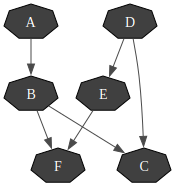

In [3]:
cr=gum.CredalNet(bn,bn)
gnb.show(cr)

In [4]:
cr.bnToCredal(beta=1e-10,oneNet=False)
cr.computeBinaryCPTMinMax()
print(cr)


A:Range([0,1])
<> : [[0.781716 , 0.218284] , [0.781714 , 0.218286]]

B:Range([0,1])
<A:0> : [[0.483512 , 0.516488] , [0.483398 , 0.516602]]
<A:1> : [[0.288811 , 0.711189] , [0.0485366 , 0.951463]]

C:Range([0,1])
<B:0|D:0> : [[0.620234 , 0.379766] , [0.62022 , 0.37978]]
<B:1|D:0> : [[0.18812 , 0.81188] , [0.103872 , 0.896128]]
<B:0|D:1> : [[0.365709 , 0.634291] , [0.364939 , 0.635061]]
<B:1|D:1> : [[0.61672 , 0.38328] , [0.616704 , 0.383296]]

D:Range([0,1])
<> : [[0.181911 , 0.818089] , [0.130562 , 0.869438]]

E:Range([0,1])
<D:0> : [[0.436345 , 0.563655] , [0.436105 , 0.563895]]
<D:1> : [[0.772594 , 0.227406] , [0.772592 , 0.227408]]

F:Range([0,1])
<E:0|B:0> : [[0.258536 , 0.741464] , [0.253134 , 0.746866]]
<E:1|B:0> : [[0.215163 , 0.784837] , [0.201277 , 0.798723]]
<E:0|B:1> : [[0.314248 , 0.685752] , [0.312355 , 0.687645]]
<E:1|B:1> : [[0.766534 , 0.233466] , [0.766532 , 0.233468]]




## Testing difference hypothesis about the global precision on the parameters

We can therefore easily conduct a sensitivity analysis based on an assumption of error on all the parameters of the network.

In [5]:
def showNoisy(bn,beta):
  cr=gum.CredalNet(bn,bn)
  cr.bnToCredal(beta=beta,oneNet=False)
  cr.computeBinaryCPTMinMax()
  ielbp=gum.CNLoopyPropagation(cr)  
  return gnb.getInference(cr,engine=ielbp)

In [ ]:
for eps in [1,1e-3,1e-5,1e-8,1e-10]:
  gnb.flow.add(showNoisy(bn,eps),caption=f"noise={eps}")
gnb.flow.display()